# Brownian motion

Een van de bekendste voorbeelden van botsende deeltjes in de natuur is Brownian motion.
Fijn gemalen pollen in water lijken te dansen in willekeurige richting.
Dit komt doordat de pollen worden geraakt door watermoleculen die in alle richtingen bewegen.
Omdat de pollen veel zwaarder zijn dan watermoleculen, dus de beweging van de pollen is veel langzamer en minder "intens" dan die van de watermoleculen.
Dit proces van willekeurige beweging door botsingen met kleinere deeltjes wordt Brownian motion genoemd en kunnen we simuleren op basis van ons (premature) botsingsmodel.
Daarbij kunnen we ook gebruik maken van de zojuist geleerde manier van tracking van deeltjes, waarbij we een zowel het zware bolletjes als een enkel deeltje kunnen volgen.

Let op!
We bestuderen hier nog geen thermische effecten, deze opdrachten zijn met name bedoeld om beter te begrijpen hoe het botsingsmodel in elkaar zit.

```{warning}
In dit notebook zitten delen waar ruimte is om code toe te voegen, maar waarbij je denkt... waarom dan?
In een latere opdracht moet je terug naar die cell en de juiste code toevoegen.
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Maken van de ParticleClass
import numpy as np
import matplotlib.pyplot as plt

# =========================
# ParticleClass definitie
# =========================

class ParticleClass:
    # Initialisatie van het deeltje
    def __init__(self, m, v, r, R, c):
        self.m = m                          # Massa van het deeltje
        self.v = np.array(v, dtype=float)   # Snelheid als vector [vx, vy]
        self.r = np.array(r, dtype=float)   # Positie als vector [x, y]
        self.R = np.array(R, dtype=float)   # Straal van het deeltje
        self.c = c                          # Kleur voor visualisatie

    # Update de positie op basis van snelheid en dt
    def update_position(self):
        self.r += self.v * dt               # Eenvoudige Euler update
        # Eventueel kan hier zwaartekracht of andere krachten toegevoegd worden
              
    # Detectie van botsing met box-wanden
    def boxcollision(self):
        # Botsing met verticale wanden
        if abs(self.r[0]) + self.R > Box_length: 
            self.v[0] = -self.v[0]                                  # Snelheid omkeren
            self.r[0] = np.sign(self.r[0]) * (Box_length - self.R)  # Terugzetten binnen box
        # Botsing met horizontale wanden
        if abs(self.r[1]) + self.R > Box_length: 
            self.v[1] = -self.v[1]
            self.r[1] = np.sign(self.r[1]) * (Box_length - self.R) 

    # Eigenschap: momentum
    @property
    def momentum(self):
        return self.m * self.v
    
    # Eigenschap: kinetische energie
    @property
    def kin_energy(self):
        return 1/2 * self.m * np.dot(self.v, self.v)

# Randvoorwaarden en initiele condities

Box_size_0 = 10
Box_length_0 = Box_size_0/2
Box_length = Box_length_0     # Grootte van de box (kan later wijzigen)

dt = 0.04                     # Tijdstap voor simulatie
particles = []                # Lijst voor alle deeltjes in de simulatie
N = 40                        # Aantal lichte deeltjes
v_0 = 1                       # Maximale initiële snelheid van lichte deeltjes

# Aanmaken van deeltjes

for i in range(N-1):
    # Willekeurige snelheid, zodat |v| = v_0
    vx = np.random.uniform(-v_0, v_0)
    vy = np.random.choice([-1, 1]) * np.sqrt(v_0**2 - vx**2)  
    # Willekeurige startpositie binnen de box
    pos = Box_length_0 * np.random.uniform(-1, 1, 2)
    # Voeg het lichte deeltje toe (massa=1, kleur=blauw)
    particles.append(
        ParticleClass(m=1.0, v=[vx, vy], r=pos, R=.5, c='blue')
    )

# Voeg zwaar deeltje toe (Brownian motion)

# Dit is het zwaardere deeltje (bijv. een pollenbolletje)
# Massa = 20x groter dan de lichte deeltjes
# Startpositie = midden van de box
# Snelheid = 0 (stilstaand)
# Kleur = rood (opvallen in visualisatie)
particles.append(
    ParticleClass(m=20.0, v=[0, 0], r=[0, 0], R=.5, c='red')
)


```{exercise} Brownian motion
:label: ex-brownian-1

Leg uit wat er in de laatste regel van bovenstaande script gebeurt.
Voeg voor deze regel goede metadata toe.
```

```{solution} ex-brownian-1
Uitleg van wat hier gebeurt:

ParticleClass(...): Er wordt een nieuw deeltje aangemaakt met de eigenschappen die in de haakjes zijn gespecificeerd.
m=20.0: Dit deeltje is veel zwaarder dan de andere deeltjes (die massa = 1 hebben). Dit modelleert bijvoorbeeld een pollenbolletje in water.
v=[0, 0]: Het deeltje begint stilstaand, met geen initiële snelheid.
r=[0, 0]: Het deeltje wordt geplaatst in het midden van de box (coördinaten (0,0)).
R=.5: De straal van het deeltje is 0.5, net zoals bij de andere deeltjes.
c='red': Dit deeltje wordt rood weergegeven in de visualisatie, zodat het duidelijk opvalt als het “Brownian motion”-deeltje.
particles.append(...): Het nieuwe deeltje wordt toegevoegd aan de lijst particles, waarin alle deeltjes in de simulatie staan.

Dit is het zwaardere deeltje dat door de kleinere deeltjes zal worden “gestoten”, waardoor het Browniaanse beweging gaat vertonen. De rode kleur en grotere massa maken het onderscheidend en zorgen ervoor dat we het makkelijk kunnen volgen in de simulatie.
```

Er is een doos vol met deeltjes op willekeurige positie aangemaakt.
We willen kijken waar de deeltjes zijn terechtgekomen.
Hieronder staat dit weergegeven. 



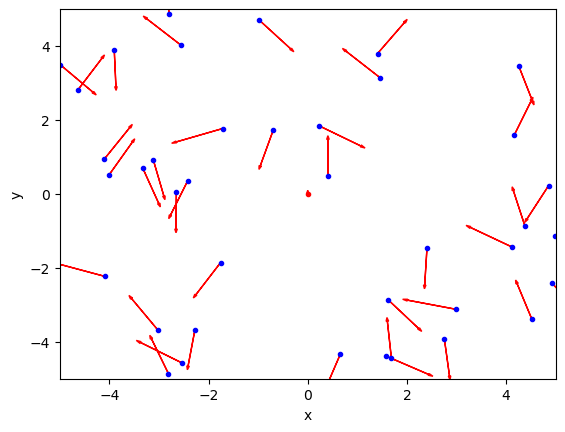

In [6]:
# Inspecteren van beginsituatie
plt.figure()

plt.xlabel('x')
plt.ylabel('y')

plt.xlim(-Box_length_0,Box_length_0)
plt.ylim(-Box_length_0,Box_length_0)


for particle, particle_object in enumerate(particles):
    plt.plot(particle_object.r[0],particle_object.r[1],color=particle_object.c,marker='.')
    plt.arrow(particle_object.r[0],particle_object.r[1], 
               particle_object.v[0],particle_object.v[1], 
               head_width=0.05, head_length=0.1, color='red')
plt.show()


```{exercise} 
:label: ex-brownian-2

Er staat ook code met comments ervoor, wat doet deze code? 
Check je antwoord door de comments weg te halen.
Hoe wordt er voor gezorgd dat de snelheid van elk deeltje gelijk is?
```

```{solution} ex-brownian-2
De code tekent een plot van alle deeltjes in de box met hun startposities.

Kleuren en markers maken het verschil tussen lichte en zware deeltjes zichtbaar.

De snelheid van lichte deeltjes is allemaal gelijk (v_0), omdat vy wordt gekozen afhankelijk van vx zodat de totale snelheid constant blijft.

Eerst wordt vx willekeurig gekozen tussen -v_0 en v_0.

Daarna wordt vy zo gekozen dat de totale snelheid |v| exact v_0 is:
|v| = np.sqrt(vx**2 +vy**2) = v0

Dit zorgt ervoor dat alle lichte deeltjes dezelfde snelheid hebben, maar in een willekeurige richting.

Het zware deeltje (massa 20) krijgt initieel v = [0, 0], dus het beweegt nog niet.

De pijlen geven de snelheid en richting van de deeltjes.
Uitcommentarieerde plt.arrow kan gebruikt worden om snelheidsvectoren te visualiseren.
```

We gaan nu de functies van de simulatie weer aanroepen:

In [7]:
# Het bepalen of er een botsing plaats vindt
def collide_detection(self, other):
    dx = self.r[0] - other.r[0]
    dy = self.r[1] - other.r[1]
    rr = self.R + other.R
    return  dx**2+dy**2 < rr**2 
        
def particle_collision(p1: ParticleClass, p2: ParticleClass):
    """ past snelheden aan uitgaande van overlap """
    m1, m2 = p1.m, p2.m
    delta_r = p1.r - p2.r
    delta_v = p1.v - p2.v
    dot_product = np.dot(delta_r, delta_v)
    
    # Als deeltjes van elkaar weg bewegen dan geen botsing
    if dot_product >= 0: # '='-teken voorkomt ook problemen als delta_r == \vec{0}
        return
    
    distance_squared = np.dot(delta_r, delta_r) 
    # Botsing oplossen volgens elastische botsing in 2D
    p1.v -= 2 * m2 / (m1 + m2) * dot_product / distance_squared * delta_r
    p2.v += 2 * m1 / (m1 + m2) * dot_product / distance_squared * delta_r

def handle_collisions(particles):
#your code/answer
    """ alle onderlinge botsingen afhandelen voor deeltjes in lijst """
    num_particles = len(particles)
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])
#your code/answer


In onderstaande code geven we de code voor de simulatie en volgen we de positie van het zware deeltje. 

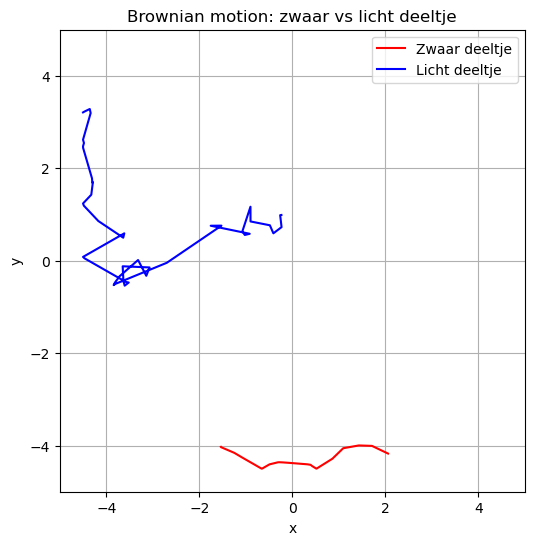

In [10]:
# Tracking van deeltjes
track_x_heavy = []  # x-positie van zwaar deeltje
track_y_heavy = []  # y-positie van zwaar deeltje

track_x_light = []  # x-positie van licht deeltje
track_y_light = []  # y-positie van licht deeltje

# Kies een licht deeltje om te volgen (bijv. het eerste in de lijst)
light_index = 0

# Simulatie parameters
num_steps = 400  # aantal tijdstappen

for i in range(num_steps):
    # Update positie en botsingen met box
    for p in particles:
        p.update_position()    
        p.boxcollision()   
    
    # Los onderlinge botsingen op
    handle_collisions(particles)
    
    # Track het zware deeltje (laatste in de lijst)
    track_x_heavy.append(particles[N-1].r[0])
    track_y_heavy.append(particles[N-1].r[1])
    
    # Track het gekozen lichte deeltje
    track_x_light.append(particles[light_index].r[0])
    track_y_light.append(particles[light_index].r[1])

# Visualisatie
plt.figure(figsize=(6,6))
plt.plot(track_x_heavy, track_y_heavy, 'r', label='Zwaar deeltje')
plt.plot(track_x_light, track_y_light, 'b', label='Licht deeltje')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Brownian motion: zwaar vs licht deeltje')
plt.xlim(-Box_length_0, Box_length_0)
plt.ylim(-Box_length_0, Box_length_0)
plt.legend()
plt.grid(True)
plt.show()


```{exercise} Brownian motion in beeld
:label: ex-brownian-3
- Draai de onderstaande simulatie een keer en bestudeer de output.
- Voeg zelf een tweede tracking toe van een licht deeltje en verbeter de plot.
- Wat zijn overeenkomsten en verschillen tussen de beweging van de twee deeltjes?
- Wat valt je op als je de simulatie een aantal keer runt?
```

```{solution} ex-brownian-3
Overeenkomsten:
Beide deeltjes bewegen willekeurig door de box.
De richting van beweging verandert continu door botsingen met andere deeltjes.

Verschillen:
Het zware deeltje (rood) beweegt veel langzamer en over kleinere afstanden per tijdstap.
Het lichte deeltje (blauw) beweegt veel sneller en met grotere sprongen.
De snelheid van het zware deeltje wordt voornamelijk beïnvloed door botsingen met de lichtere deeltjes (Brownian motion).

Observaties bij meerdere runs:
Het pad van elk deeltje is willekeurig en anders bij elke run.
Het zware deeltje blijft meestal in een klein gebied rond zijn startpositie, terwijl het lichte deeltje de hele box kan doorkruisen.
Dit simuleert goed het verschil tussen een pollenbolletje in water en de kleinere watermoleculen.
```

We zouden gevoel willen krijgen voor het aantal botsingen dat per tijdseenheid plaatsvindt. 
Elke keer dat er een botsing plaatsvindt, zou de counter met 1 omhoog moeten gaan.
Idealiter wordt het aantal botsingen opgeslagen in een array zodat je het aantal botsingen als functie van de tijd kunt weergeven.

```{exercise}
Pas bovenstaand idee toe in de eerder gemaakte code.
Plot hieronder het aantal botsingen als functie van de tijd.
```

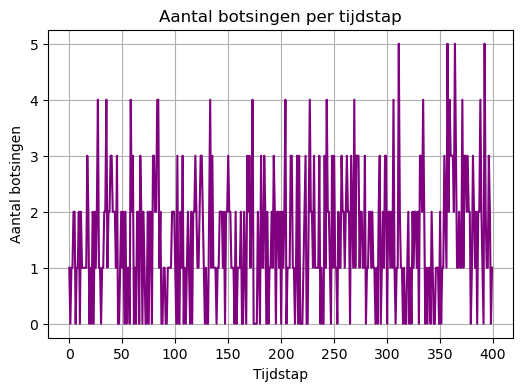

In [11]:
# Tracking van deeltjes en botsingen
track_x_heavy = []  # x-positie van zwaar deeltje
track_y_heavy = []

track_x_light = []  # x-positie van licht deeltje
track_y_light = []

light_index = 0  # kies het eerste lichte deeltje om te volgen

num_steps = 400  # aantal tijdstappen

# Array om het aantal botsingen per tijdstap op te slaan
collisions_per_step = []

for i in range(num_steps):
    # Update positie en botsingen met de box
    for p in particles:
        p.update_position()
        p.boxcollision()
    
    # Handle particle collisions + tellen
    collision_count = 0  # teller voor deze tijdstap
    num_particles = len(particles)
    for i_p in range(num_particles):
        for j_p in range(i_p + 1, num_particles):
            if collide_detection(particles[i_p], particles[j_p]):
                particle_collision(particles[i_p], particles[j_p])
                collision_count += 1  # tel botsing

    collisions_per_step.append(collision_count)
    
    # Track posities
    track_x_heavy.append(particles[N-1].r[0])
    track_y_heavy.append(particles[N-1].r[1])
    
    track_x_light.append(particles[light_index].r[0])
    track_y_light.append(particles[light_index].r[1])

# Plot botsingen als functie van tijd
plt.figure(figsize=(6,4))
plt.plot(collisions_per_step, color='purple')
plt.xlabel('Tijdstap')
plt.ylabel('Aantal botsingen')
plt.title('Aantal botsingen per tijdstap')
plt.grid(True)
plt.show()



```{warning} 🌶 Let op!
:icon: false
De onderstaande opdrachten vallen buiten de stof maar tellen mee als je excellent wilt behalen.
```

In zulke fysica modellen is de afgelegde weg (afstand tussen begin en eindpunt) van belang.
Deze afgelegde weg zegt iets over de snelheid van difussie.
Idealiter bekijken we een histogram.
Maar voor een histogram hebben we veel deeltjes nodig.



```{exercise} Afgelegde weg 🌶
:label: ex-brownian-4

- Maak een simulatie met 361 deeltjes, waarvan 1 zwaar deeltje.
- Houd rekening met de boxgrootte, deze moet mee schalen!
- Maak een histogram van de afgelegde weg voor alle deeltjes. 
- Geef de afgelegde weg van het grote deeltje duidelijk aan.
```


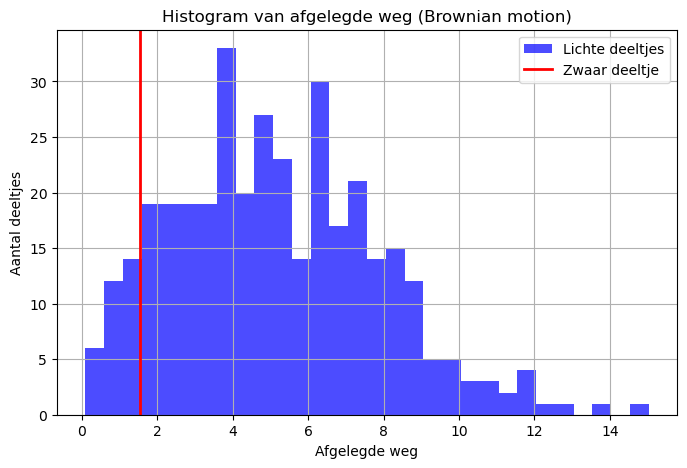

In [13]:
#your code/answer
import numpy as np
import matplotlib.pyplot as plt

# Box en deeltjes parameters
N = 361               # totaal aantal deeltjes
v_0 = 1               # snelheid lichte deeltjes
dt = 0.04
num_steps = 400       # aantal tijdstappen

# Boxgrootte mee laten schalen met aantal deeltjes
Box_size_0 = 2 * np.sqrt(N)  # ruwe schaal afhankelijk van aantal deeltjes
Box_length_0 = Box_size_0 / 2
Box_length = Box_length_0

# ParticleClass (zelfde als eerder)
class ParticleClass:
    def __init__(self, m, v, r, R, c):
        self.m = m
        self.v = np.array(v, dtype=float)
        self.r = np.array(r, dtype=float)
        self.R = np.array(R, dtype=float)
        self.c = c
        self.r_initial = self.r.copy()  # sla beginpositie op

    def update_position(self):
        self.r += self.v * dt

    def boxcollision(self):
        if abs(self.r[0]) + self.R > Box_length: 
            self.v[0] = -self.v[0]
            self.r[0] = np.sign(self.r[0]) * (Box_length - self.R)
        if abs(self.r[1]) + self.R > Box_length: 
            self.v[1] = -self.v[1]
            self.r[1] = np.sign(self.r[1]) * (Box_length - self.R)

# Collisions functies
def collide_detection(self, other):
    dx = self.r[0] - other.r[0]
    dy = self.r[1] - other.r[1]
    rr = self.R + other.R
    return dx**2 + dy**2 < rr**2

def particle_collision(p1: ParticleClass, p2: ParticleClass):
    m1, m2 = p1.m, p2.m
    delta_r = p1.r - p2.r
    delta_v = p1.v - p2.v
    dot_product = np.dot(delta_r, delta_v)
    if dot_product >= 0:
        return
    distance_squared = np.dot(delta_r, delta_r)
    p1.v -= 2 * m2 / (m1 + m2) * dot_product / distance_squared * delta_r
    p2.v += 2 * m1 / (m1 + m2) * dot_product / distance_squared * delta_r

def handle_collisions(particles):
    num_particles = len(particles)
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])

# Aanmaken deeltjes
particles = []

# Lichte deeltjes
for i in range(N-1):
    vx = np.random.uniform(-v_0, v_0)
    vy = np.random.choice([-1, 1]) * np.sqrt(v_0**2 - vx**2)
    pos = Box_length_0 * np.random.uniform(-1,1,2)
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r=pos, R=0.5, c='blue'))

# Zwaar deeltje
particles.append(ParticleClass(m=20.0, v=[0,0], r=[0,0], R=0.5, c='red'))

# Simulatie loop
for step in range(num_steps):
    for p in particles:
        p.update_position()
        p.boxcollision()
    handle_collisions(particles)

# Afgelegde weg berekenen
distances = [np.linalg.norm(p.r - p.r_initial) for p in particles]

# Histogram plotten
plt.figure(figsize=(8,5))
plt.hist(distances[:-1], bins=30, color='blue', alpha=0.7, label='Lichte deeltjes')
plt.axvline(distances[-1], color='red', linewidth=2, label='Zwaar deeltje')
plt.xlabel('Afgelegde weg')
plt.ylabel('Aantal deeltjes')
plt.title('Histogram van afgelegde weg (Brownian motion)')
plt.legend()
plt.grid(True)
plt.show()


En nu we toch bezig zijn met twee verschillende deeltjes.... 

We kunnen twee "groepen" van deeltjes aanmaken, elk  met een andere massa. Als we dan de zwaartekracht aan zetten, dan zouden we verwachten dat de lichtere deeltjes boven komen "drijven".

```{exercise} Onderzoek dit vermoeden 🌶
- maak daartoe de box 2x zo hoog als breed
- verdubbel het totaal aantal deeltjes
- zet een artificieel grote zwaartekracht aan
```

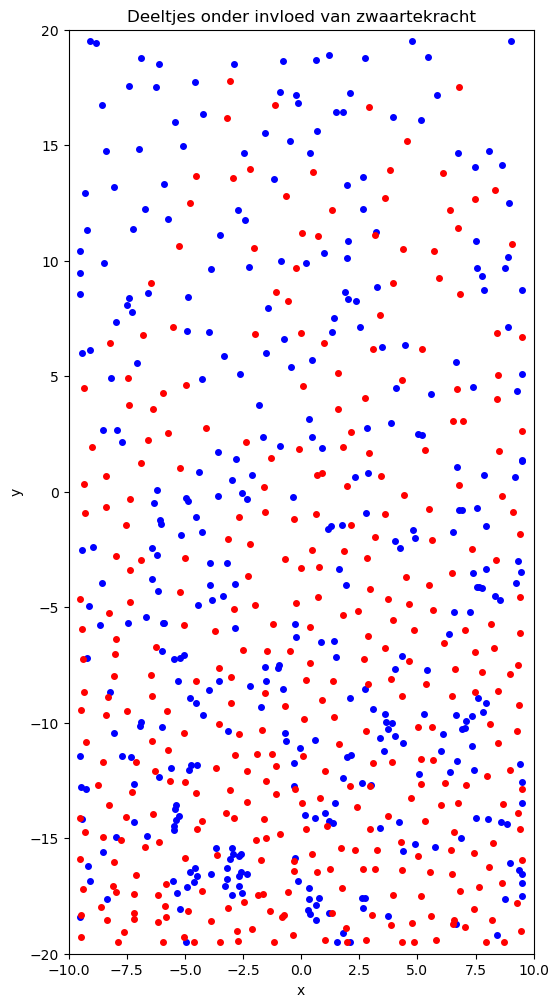

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Box en simulatie parameters
N = 722                 # verdubbeld aantal deeltjes
v_0 = 1
dt = 0.04
num_steps = 400

Box_width = 20
Box_height = 40         # 2x zo hoog als breed
Box_length_x = Box_width / 2
Box_length_y = Box_height / 2

g = 5.0                 # kunstmatige grote zwaartekracht in y-richting

# ParticleClass met zwaartekracht
class ParticleClass:
    def __init__(self, m, v, r, R, c):
        self.m = m
        self.v = np.array(v, dtype=float)
        self.r = np.array(r, dtype=float)
        self.R = np.array(R, dtype=float)
        self.c = c
        self.r_initial = self.r.copy()

    def update_position(self):
        # zwaartekracht in y-richting: v_y += a*dt, a = g/m
        self.v[1] -= g * dt  # 'omlaag' in negatieve y-richting
        self.r += self.v * dt

    def boxcollision(self):
        # horizontale wanden
        if abs(self.r[0]) + self.R > Box_length_x: 
            self.v[0] = -self.v[0]
            self.r[0] = np.sign(self.r[0]) * (Box_length_x - self.R)
        # verticale wanden
        if abs(self.r[1]) + self.R > Box_length_y: 
            self.v[1] = -self.v[1]
            self.r[1] = np.sign(self.r[1]) * (Box_length_y - self.R)

# Collisions functies (zelfde als eerder)
def collide_detection(self, other):
    dx = self.r[0] - other.r[0]
    dy = self.r[1] - other.r[1]
    rr = self.R + other.R
    return dx**2 + dy**2 < rr**2

def particle_collision(p1: ParticleClass, p2: ParticleClass):
    m1, m2 = p1.m, p2.m
    delta_r = p1.r - p2.r
    delta_v = p1.v - p2.v
    dot_product = np.dot(delta_r, delta_v)
    if dot_product >= 0:
        return
    distance_squared = np.dot(delta_r, delta_r)
    p1.v -= 2 * m2 / (m1 + m2) * dot_product / distance_squared * delta_r
    p2.v += 2 * m1 / (m1 + m2) * dot_product / distance_squared * delta_r

def handle_collisions(particles):
    num_particles = len(particles)
    for i in range(num_particles):
        for j in range(i+1, num_particles):
            if collide_detection(particles[i], particles[j]):
                particle_collision(particles[i], particles[j])

# Aanmaken deeltjes
particles = []

# Eerste groep: lichte deeltjes
for i in range(N//2):
    vx = np.random.uniform(-v_0, v_0)
    vy = np.random.choice([-1,1]) * np.sqrt(v_0**2 - vx**2)
    pos = np.array([np.random.uniform(-Box_length_x, Box_length_x),
                    np.random.uniform(-Box_length_y, Box_length_y)])
    particles.append(ParticleClass(m=1.0, v=[vx, vy], r=pos, R=0.5, c='blue'))

# Tweede groep: zwaardere deeltjes
for i in range(N//2):
    vx = np.random.uniform(-v_0, v_0)
    vy = np.random.choice([-1,1]) * np.sqrt(v_0**2 - vx**2)
    pos = np.array([np.random.uniform(-Box_length_x, Box_length_x),
                    np.random.uniform(-Box_length_y, Box_length_y)])
    particles.append(ParticleClass(m=5.0, v=[vx, vy], r=pos, R=0.5, c='red'))

# Simulatie loop
for step in range(num_steps):
    for p in particles:
        p.update_position()
        p.boxcollision()
    handle_collisions(particles)

# Visualisatie
plt.figure(figsize=(6,12))  # hoog/smal vanwege boxverhouding
for p in particles:
    plt.plot(p.r[0], p.r[1], marker='o', color=p.c, markersize=4)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Deeltjes onder invloed van zwaartekracht')
plt.xlim(-Box_length_x, Box_length_x)
plt.ylim(-Box_length_y, Box_length_y)
plt.show()

